h

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
pd.pandas.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score, confusion_matrix, precision_score

In [2]:
data_set = pd.read_csv('corona_tested_individuals.csv')

C:\Users\sujith kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_set.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


### DATA SET -https://data.gov.il/dataset/covid-19 (English)

### Data set contains 9 features and one target variable ('Corona result')
- test-date : This features give us a information about when the test is done and result is noted down.
- cough: It reveals whether or not the patient has a cough.
- fever: It tells whether or not the patient has a temperature.
- sore_throat: It reveals whether or not the patient has a sore throat.
- shortness_of_breath: It reveals whether or not the patient is experiencing shortness of breath.
- head_ache: It indicates whether or not the patient is suffering from a headache..
- age_60_and_above: It indicates whether the patient is over the age of 60.
- gender: This characteristic identifies whether the patient is male or female.
- test_indication: This features says whether the covid- 19 is transfer via aboard or confirmed with contact or some other reson.
- corona result: This trait indicates whether a person have covid-19 or not.

# Data Preprocessing

In [3]:
# Dropping test_date because it does not much effect on the output.

In [5]:
data_set.drop('test_date', inplace=True, axis=1)

In [6]:
data_set['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [7]:
data_set = data_set[data_set['cough']!='None']
data_set = data_set[data_set['fever']!='None']

In [8]:
data_set.replace(['1', '0'], [1, 0], inplace=True)

In [9]:
np.unique(data_set['corona_result'])

array(['negative', 'other', 'positive'], dtype=object)

In [10]:
# lets drop other values rows and focus more on negative and positive results.
data_set = data_set[data_set['corona_result']!='other']

In [11]:
np.unique(data_set['corona_result'])

array(['negative', 'positive'], dtype=object)

In [12]:
data_set['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)

In [13]:
np.unique(data_set['age_60_and_above'])
# lets drop None value rows and focus more on No and Yes results.
data_set = data_set[data_set['age_60_and_above']!='None']

In [14]:
data_set['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [15]:
np.unique(data_set['gender'])
data_set = data_set[data_set['gender']!='None']

In [16]:
data_set['gender'].replace(['female', 'male'], [0, 1], inplace=True)

In [17]:
np.unique(data_set['test_indication'])

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [18]:
dummies = pd.get_dummies(data_set['test_indication'])
data_set.drop('test_indication', inplace=True, axis=1)
data_set = pd.concat([data_set, dummies], axis=1)

In [19]:
data_set.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
122808,1,0,0,0,0,0,1,1,0,0,1
122809,1,0,0,0,0,1,0,0,0,0,1
122810,0,0,0,0,0,0,0,0,0,0,1
122811,0,1,0,0,0,0,0,0,1,0,0
122812,1,0,0,0,0,0,1,0,0,0,1


# Data Visualization

<AxesSubplot:xlabel='corona_result', ylabel='count'>

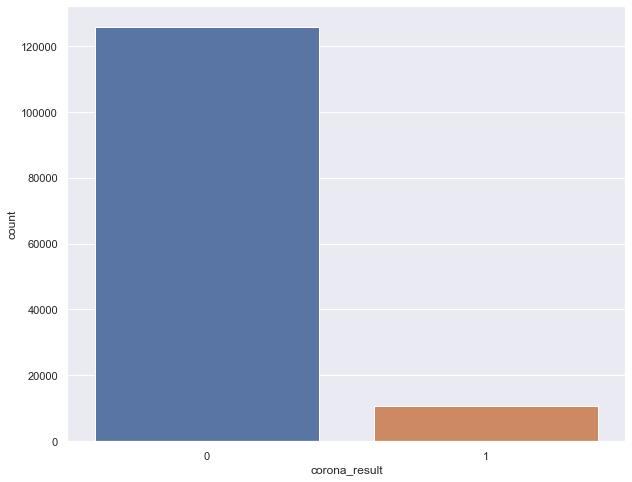

In [20]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(x=data_set['corona_result'])

In [21]:
feature_count = [sum(data_set[unique_characteristic].values) for unique_characteristic in data_set]

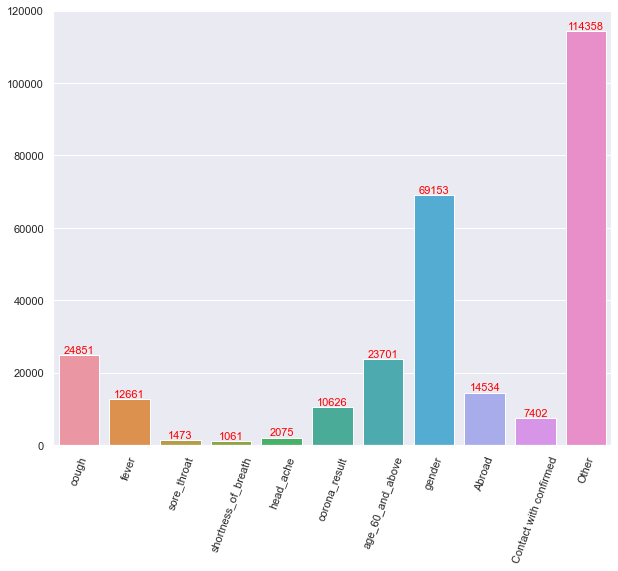

In [22]:
bar_plot = sns.barplot(x = data_set.columns, y = feature_count)
plt.setp(bar_plot.get_xticklabels(), rotation=70)
for i in range(len(feature_count)):
    bar_plot.text(i, feature_count[i]+500, str(feature_count[i]), fontdict= dict(color='red', fontsize= 11), horizontalalignment = "center")

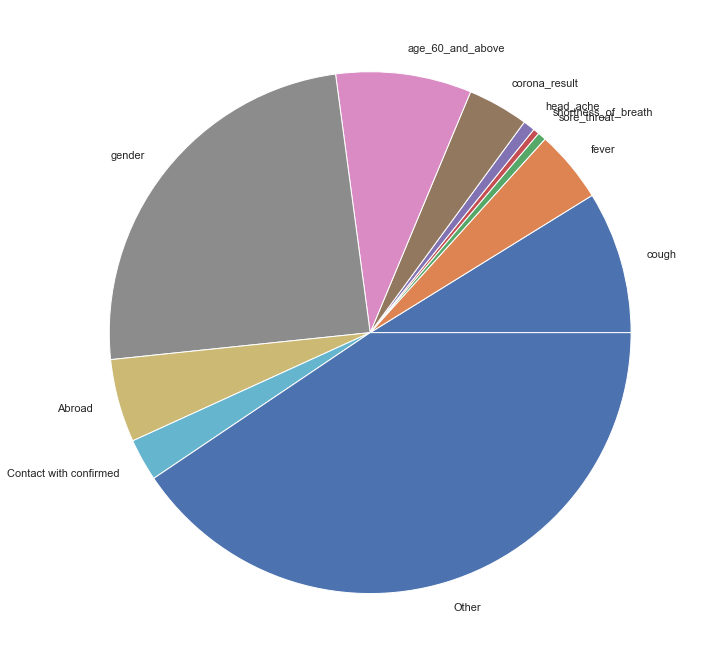

In [23]:
plt.figure(figsize = (12 ,12))
pie_plot = plt.pie(data=data_set, x=feature_count, labels=data_set.columns)
plt.show()

array([[<AxesSubplot:title={'center':'cough'}>,
        <AxesSubplot:title={'center':'fever'}>,
        <AxesSubplot:title={'center':'sore_throat'}>],
       [<AxesSubplot:title={'center':'shortness_of_breath'}>,
        <AxesSubplot:title={'center':'head_ache'}>,
        <AxesSubplot:title={'center':'corona_result'}>],
       [<AxesSubplot:title={'center':'age_60_and_above'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'Abroad'}>],
       [<AxesSubplot:title={'center':'Contact with confirmed'}>,
        <AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

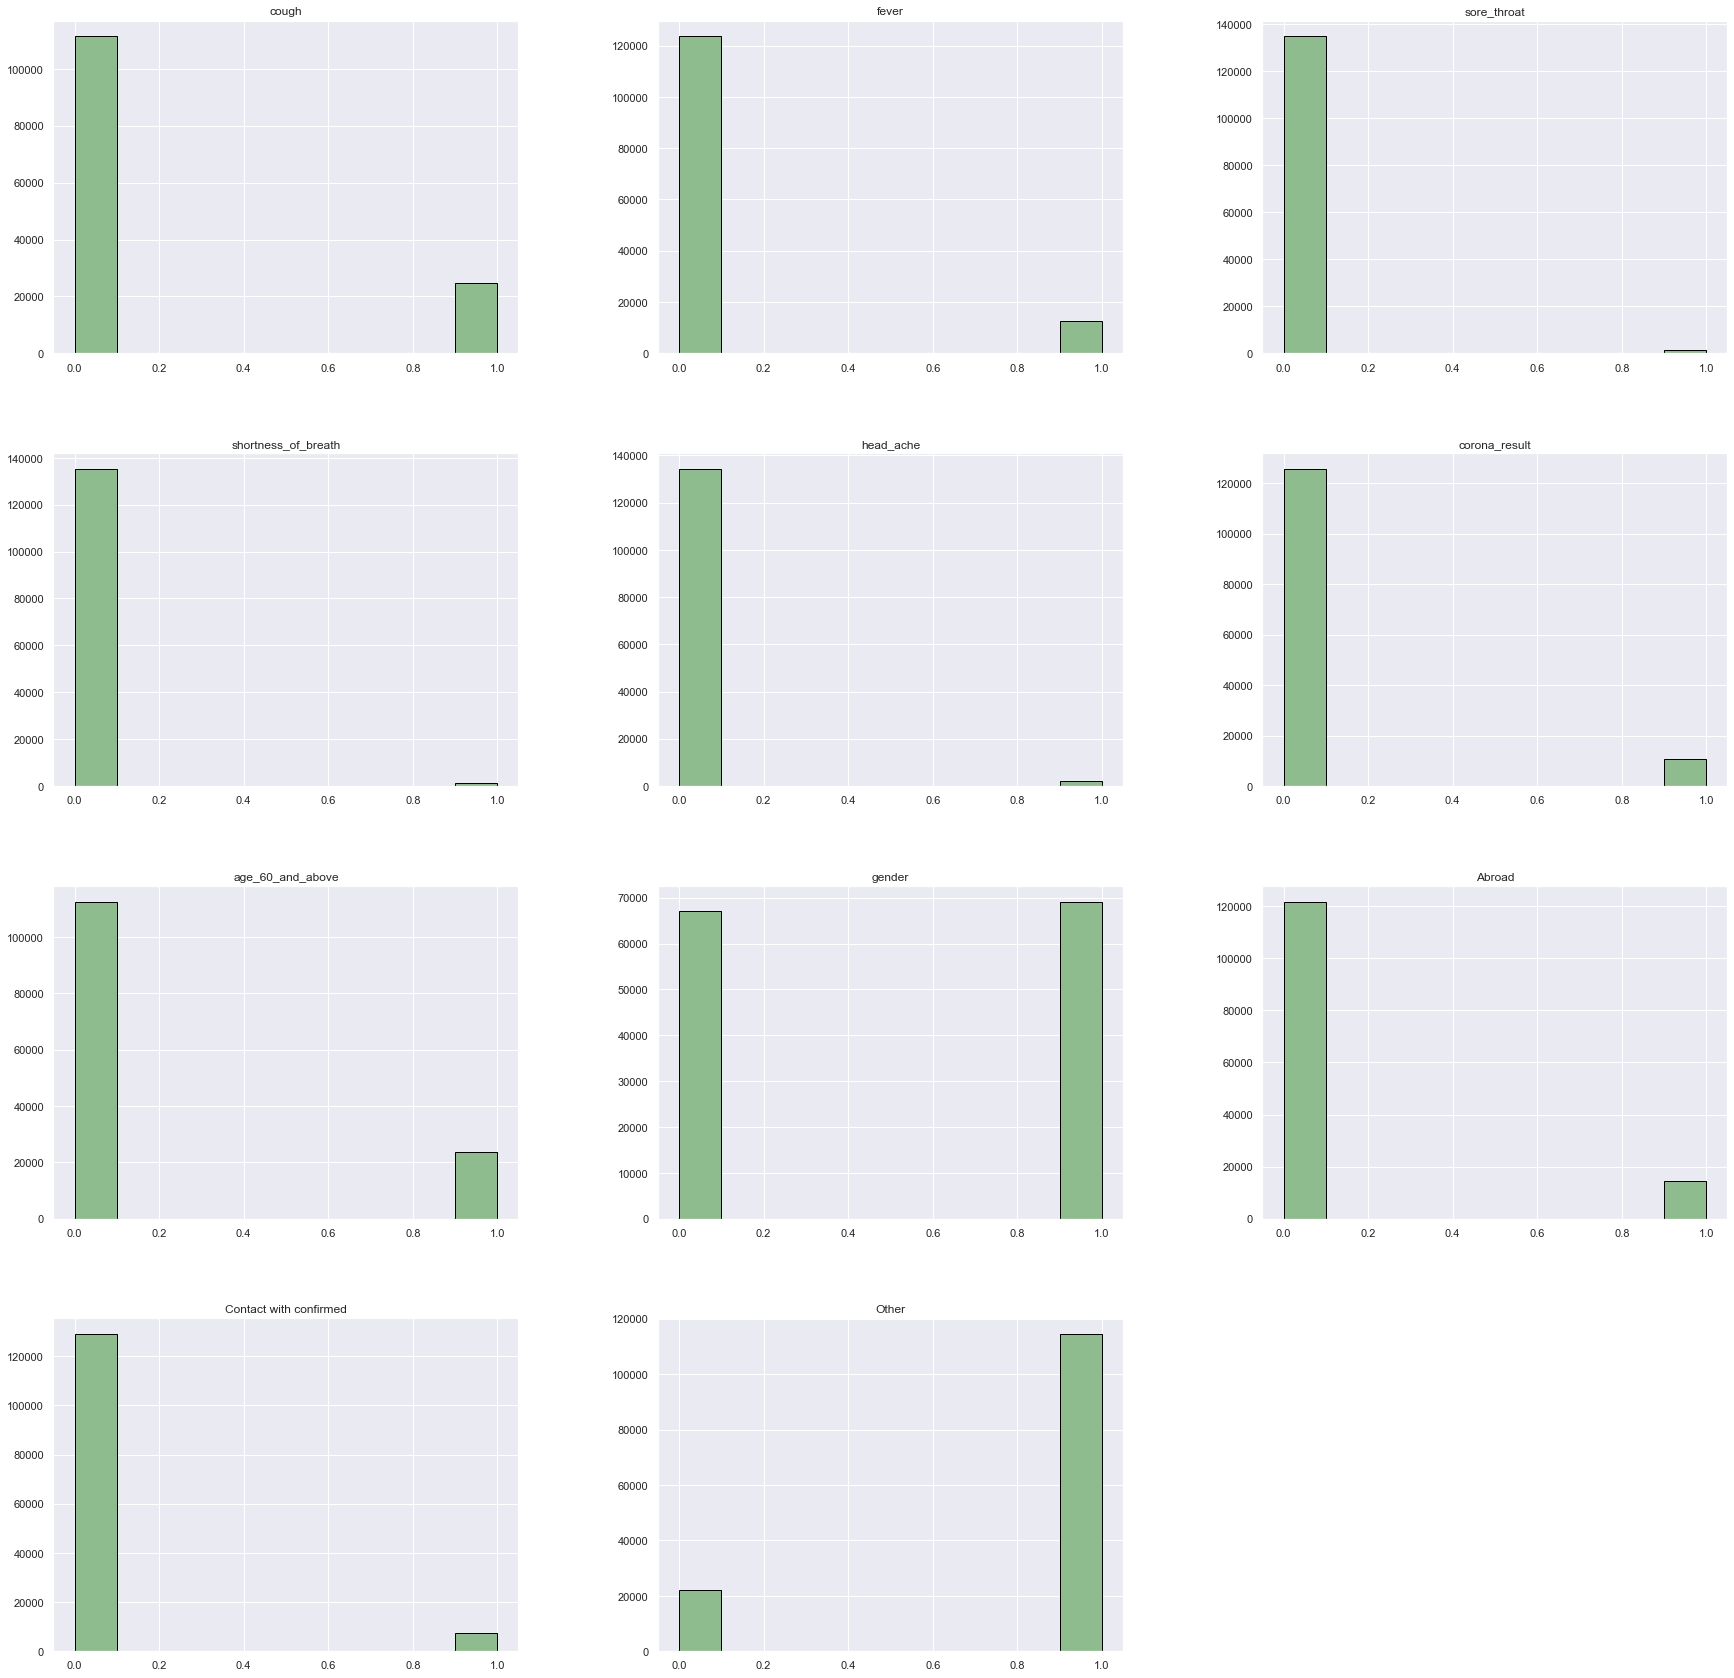

In [24]:
data_set.hist(figsize=(30,30), edgecolor='black', color='darkseagreen')

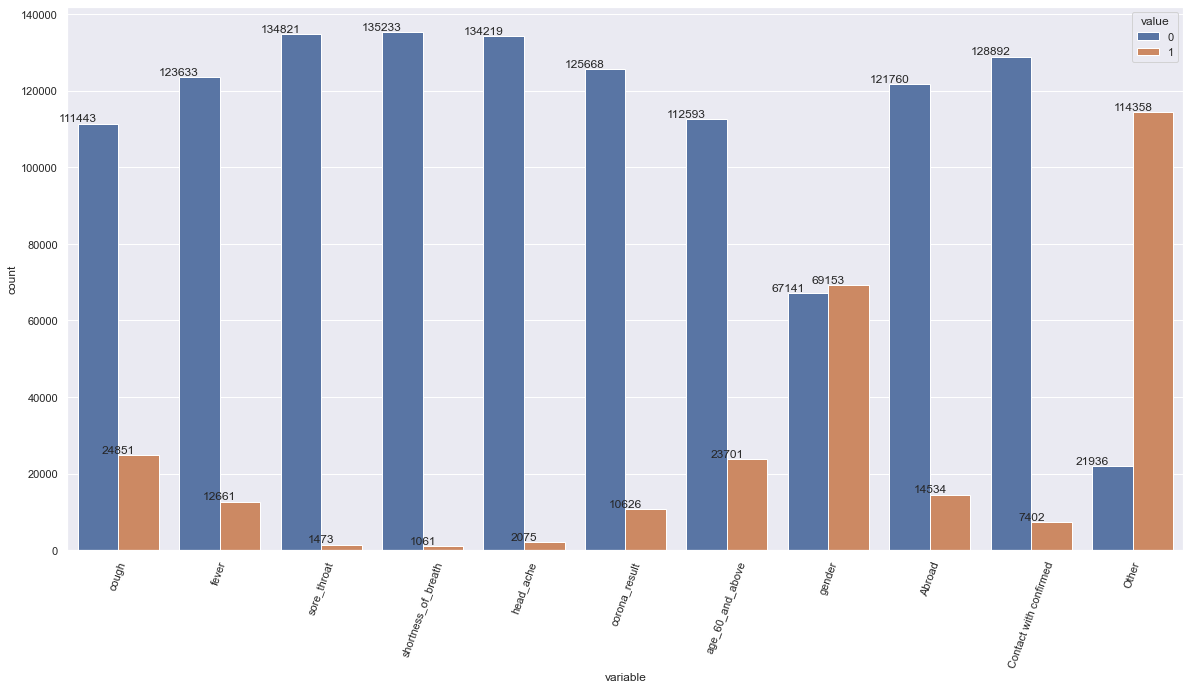

In [25]:
plt.figure(figsize = (20 ,10))
count_plots = sns.countplot(x="variable", hue="value", data=pd.melt(data_set))
plt.setp(count_plots.get_xticklabels(), rotation=70)
for p in count_plots.patches:
        count_plots.annotate(int(p.get_height()), (p.get_x(), p.get_height()+500), horizontalalignment = "center")
plt.show()

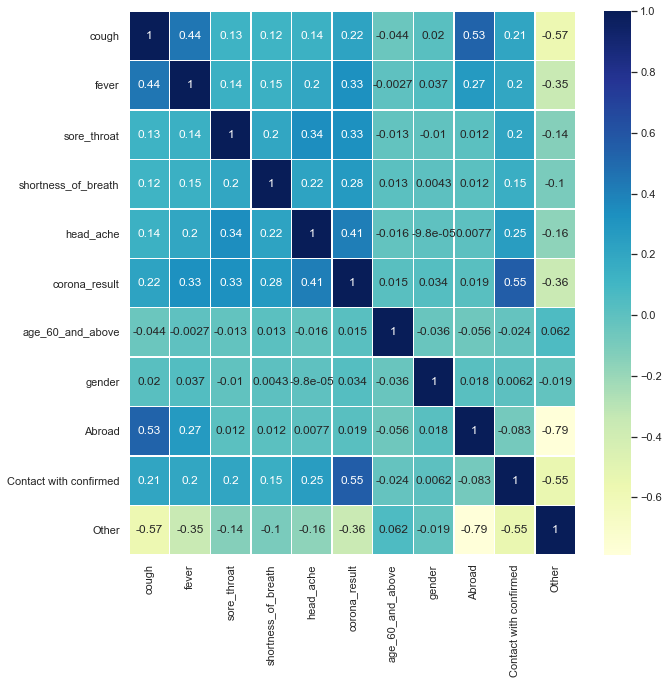

In [26]:
sns.heatmap(data_set.corr(),annot=True,cmap='YlGnBu',linewidths=0.4, annot_kws={"size": 12}) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Model Training

In [27]:
data_set.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
122808,1,0,0,0,0,0,1,1,0,0,1
122809,1,0,0,0,0,1,0,0,0,0,1
122810,0,0,0,0,0,0,0,0,0,0,1
122811,0,1,0,0,0,0,0,0,1,0,0
122812,1,0,0,0,0,0,1,0,0,0,1


In [28]:
display("NULL Values", data_set.isnull().sum())

'NULL Values'

cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                    0
Abroad                    0
Contact with confirmed    0
Other                     0
dtype: int64

In [29]:
display("Description", data_set.describe()) 

'Description'

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
count,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000,136294.000000
mean,0.182334,0.092895,0.010808,0.007785,0.015224,0.077964,0.173896,0.507381,0.106637,0.054309,0.839054
std,0.386121,0.290286,0.103396,0.087887,0.122445,0.268116,0.379022,0.499947,0.308652,0.226627,0.367483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136294 entries, 122808 to 265120
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   cough                   136294 non-null  int64
 1   fever                   136294 non-null  int64
 2   sore_throat             136294 non-null  int64
 3   shortness_of_breath     136294 non-null  int64
 4   head_ache               136294 non-null  int64
 5   corona_result           136294 non-null  int64
 6   age_60_and_above        136294 non-null  int64
 7   gender                  136294 non-null  int64
 8   Abroad                  136294 non-null  uint8
 9   Contact with confirmed  136294 non-null  uint8
 10  Other                   136294 non-null  uint8
dtypes: int64(8), uint8(3)
memory usage: 14.7 MB


In [31]:
for i in data_set.columns: 
    print("\nColumn Name:", i, "-->", data_set[i].unique(), "-->Unique Count", len(data_set[i].unique()))


Column Name: cough --> [1 0] -->Unique Count 2

Column Name: fever --> [0 1] -->Unique Count 2

Column Name: sore_throat --> [0 1] -->Unique Count 2

Column Name: shortness_of_breath --> [0 1] -->Unique Count 2

Column Name: head_ache --> [0 1] -->Unique Count 2

Column Name: corona_result --> [0 1] -->Unique Count 2

Column Name: age_60_and_above --> [1 0] -->Unique Count 2

Column Name: gender --> [1 0] -->Unique Count 2

Column Name: Abroad --> [0 1] -->Unique Count 2

Column Name: Contact with confirmed --> [0 1] -->Unique Count 2

Column Name: Other --> [1 0] -->Unique Count 2


In [32]:
y = data_set['corona_result']

In [33]:
data_set.drop('corona_result', axis=1, inplace=True)

In [34]:
time_taken = list()

In [35]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size=0.3, random_state=123, stratify=y)
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)

# DecisionTree 
DecisionTree = DecisionTreeClassifier(random_state=0) 
scores = cross_val_score(DecisionTree, data_set, y, cv=5) 


print('DecisionTree scores.mean: ', scores.mean()) 
DecisionTree = DecisionTree.fit(X_train, y_train) 
decission_pred = DecisionTree.predict(X_test) 
print('DecisionTree r2_score: ', r2_score(y_test, decission_pred)) 
end = time.time()
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
DecisionTree scores.mean:  0.9579512325481468
DecisionTree r2_score:  0.41485465591589266


# Hyper-parameter tunning

In [36]:
# lets tune max_depth to increase the accuracy

In [37]:
training_accuracy = list()
validation_accuracy = list()
for max_d in range(1,10):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(DecisionTree.score(X_train, y_train))
    validation_accuracy.append(DecisionTree.score(X_test,y_test))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), DecisionTree.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), DecisionTree.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.9582831088517373
The Validation Accuracy for max_depth 1 is: 0.957934896916041

The Training Accuracy for max_depth 2 is: 0.9582831088517373
The Validation Accuracy for max_depth 2 is: 0.957934896916041

The Training Accuracy for max_depth 3 is: 0.9582831088517373
The Validation Accuracy for max_depth 3 is: 0.957934896916041

The Training Accuracy for max_depth 4 is: 0.9582831088517373
The Validation Accuracy for max_depth 4 is: 0.957934896916041

The Training Accuracy for max_depth 5 is: 0.9582831088517373
The Validation Accuracy for max_depth 5 is: 0.957934896916041

The Training Accuracy for max_depth 6 is: 0.9582831088517373
The Validation Accuracy for max_depth 6 is: 0.957934896916041

The Training Accuracy for max_depth 7 is: 0.9582831088517373
The Validation Accuracy for max_depth 7 is: 0.957934896916041

The Training Accuracy for max_depth 8 is: 0.9582831088517373
The Validation Accuracy for max_depth 8 is: 0.957934896916041

The Trai

To understand better, we can plot the resulting accuracies as shown below. You can see the curve where the model begins to overfit.

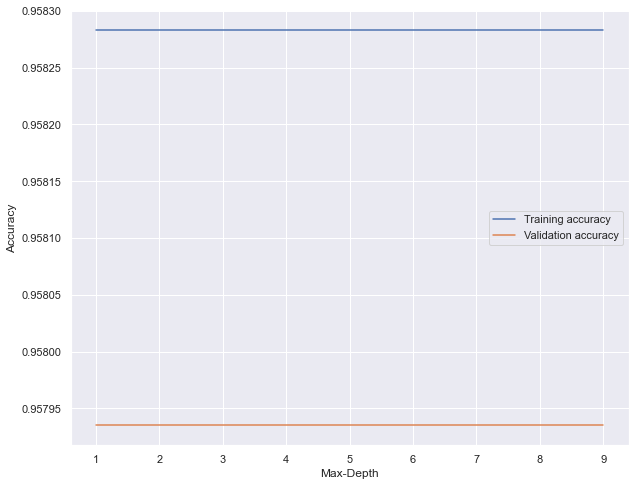

In [38]:
plt.plot(list(range(1,10)), training_accuracy )
plt.plot(list(range(1,10)), validation_accuracy)
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

We can conclude that taking any depth would result in same output!

In [39]:
training_accuracy = list()
validation_accuracy = list()
for max_f in range(2,10):
    model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= max_f , random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(DecisionTree.score(X_train, y_train))
    validation_accuracy.append(DecisionTree.score(X_test,y_test))
    print('The Training Accuracy for max_leaf_nodes {} is:'.format(max_f), DecisionTree.score(X_train, y_train))
    print('The Validation Accuracy for max_leaf_nodes {} is:'.format(max_f), DecisionTree.score(X_test,y_test))
    print('')

The Training Accuracy for max_leaf_nodes 2 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 2 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 3 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 3 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 4 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 4 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 5 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 5 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 6 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 6 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 7 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 7 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 8 is: 0.9582831088517373
The Validation Accuracy for max_leaf_nodes 8 is: 0.957934896916041

The Training Accuracy for max_leaf_nodes 9 is: 0.9582831088517

In [40]:
# lets use inbuilt packages in order to tune the paramters which is easy way

In [41]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [42]:
param_dist = {"max_depth": list(range(1,8)),
             "max_features": randint(0,8),
             "min_samples_leaf": randint(1,8),
             "criterion": ["gini", 'entropy']}
tree_cv = RandomizedSearchCV(DecisionTree, param_dist, cv=5)

In [43]:
tree_cv.fit(data_set, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CD3A16B280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CD3A1417F0>})

In [44]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 2}

In [45]:
previous_score = tree_cv.best_score_

In [46]:
# lets drop negatively effecting columns 
data_set.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,Abroad,Contact with confirmed,Other
cough,1.000000,0.444898,0.125416,0.116872,0.135117,-0.044193,0.020147,0.526316,0.209147,-0.571040
fever,0.444898,1.000000,0.143779,0.145360,0.200694,-0.002714,0.037465,0.274075,0.198677,-0.352723
sore_throat,0.125416,0.143779,1.000000,0.200670,0.337043,-0.013321,-0.009988,0.011708,0.204154,-0.135736
shortness_of_breath,0.116872,0.145360,0.200670,1.000000,0.218756,0.013325,0.004286,0.012133,0.148594,-0.101829
head_ache,0.135117,0.200694,0.337043,0.218756,1.000000,-0.016100,-0.000098,0.007713,0.252326,-0.162088
age_60_and_above,-0.044193,-0.002714,-0.013321,0.013325,-0.016100,1.000000,-0.035756,-0.056221,-0.024359,0.062243
gender,0.020147,0.037465,-0.009988,0.004286,-0.000098,-0.035756,1.000000,0.017770,0.006176,-0.018734
Abroad,0.526316,0.274075,0.011708,0.012133,0.007713,-0.056221,0.017770,1.000000,-0.082795,-0.788851
Contact with confirmed,0.209147,0.198677,0.204154,0.148594,0.252326,-0.024359,0.006176,-0.082795,1.000000,-0.547162
Other,-0.571040,-0.352723,-0.135736,-0.101829,-0.162088,0.062243,-0.018734,-0.788851,-0.547162,1.000000


In [47]:
# lets manually drop "Other" because it is negatively effecting other features

In [48]:
data_set.drop('Other', axis=1, inplace=True)

In [49]:
tree_cv = RandomizedSearchCV(DecisionTree, param_dist, cv=5)
tree_cv.fit(data_set, y)

C:\Users\sujith kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sujith kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sujith kumar\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sujith kumar\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sujith kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CD3A16B280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CD3A1417F0>})

In [50]:
current_score = tree_cv.best_score_

In [51]:
print(current_score, previous_score)

0.9579732438962264 0.9549650442700226


In [52]:
# plotting previous and current scores

<BarContainer object of 2 artists>

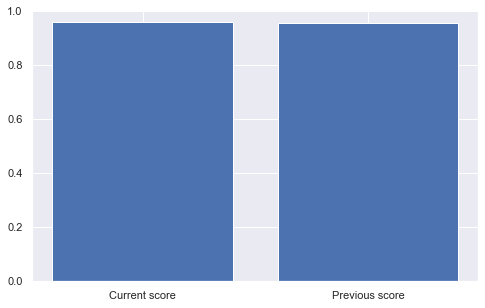

In [53]:
plt.figure(figsize=(8,5))
plt.bar(['Current score', 'Previous score'], [current_score, previous_score])

### Decision tree reached its saturation point where tunning any more params meter does not later the accuracy. To increase accuracy we either need to add more supporting features or we need more unique records in order to make dataset more robust.

# Logistic Regression

In [54]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
log = LogisticRegression()
scores = cross_val_score(log, data_set, y, cv=5) 
print('LogisticRegression scores.mean: ', scores.mean()) 
log.fit(X_train, y_train) 
pred = log.predict(X_test) 
print('LogisticRegression r2_score: ', r2_score(y_test, pred))
log_score = scores.mean()
end = time.time()
print("\n"+ str(end-start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
LogisticRegression scores.mean:  0.9506875668178327
LogisticRegression r2_score:  0.33967028321671366

1.3885900974273682


# K Nearest Neigbhours

In [55]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
Knn = KNeighborsClassifier()
scores = cross_val_score(Knn, data_set, y, cv=5) 
print('KNeighborsClassifier scores.mean: ', scores.mean()) 
Knn.fit(X_train, y_train) 
pred = Knn.predict(X_test) 
print('KNeighborsClassifier r2_score: ', r2_score(y_test, pred))
knn_score = scores.mean()
end = time.time()
print("\n"+ str(end-start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
KNeighborsClassifier scores.mean:  0.9518541257372345
KNeighborsClassifier r2_score:  0.3651853418250324

219.38802027702332


# Support Vector Classifier

In [56]:
start = time.time()
print("X_train Shape : ", X_train.shape) 
print("X_test Shape : ", X_test.shape) 
print("y_train Shape : ", y_train.shape) 
print("y_test Shape : ", y_test.shape)
svc = SVC()
scores = cross_val_score(svc, data_set, y, cv=5) 
print('SVC scores.mean: ', scores.mean()) 
svc.fit(X_train, y_train) 
pred = svc.predict(X_test) 
print('SVC r2_score: ', r2_score(y_test, pred))
svc_score = scores.mean()
end = time.time()
print("\n"+ str(end - start))
time_taken.append(end-start)

X_train Shape :  (95405, 10)
X_test Shape :  (40889, 10)
y_train Shape :  (95405,)
y_test Shape :  (40889,)
SVC scores.mean:  0.9580466190043124
SVC r2_score:  0.41859686451177935

194.00705862045288


# VotingClassifier

In [57]:
vot_clf = VotingClassifier(estimators=[('tree', DecisionTree), ('log', log), ('knn', Knn), ('SVC', svc)], voting='hard')
vot_clf.fit(data_set, y)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=0)),
                             ('log', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('SVC', SVC())])

In [58]:
vot_pred = vot_clf.predict(data_set)

In [59]:
vot_clf.score(data_set, y)

0.958237339868226

C:\Users\sujith kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


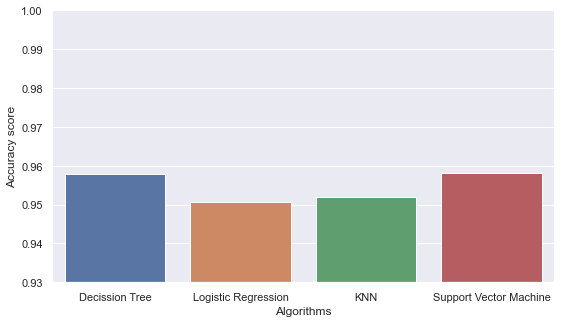

In [60]:
with sns.color_palette('muted'):
    algothrim_name = ['Decission Tree', 'Logistic Regression', 'KNN', 'Support Vector Machine']
    scores = [current_score, log_score, knn_score, svc_score]
    sns.set(rc={'figure.figsize':(9,5)})
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy score")
    plt.ylim(0.93, 1)
    sns.barplot(algothrim_name, scores)

C:\Users\sujith kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


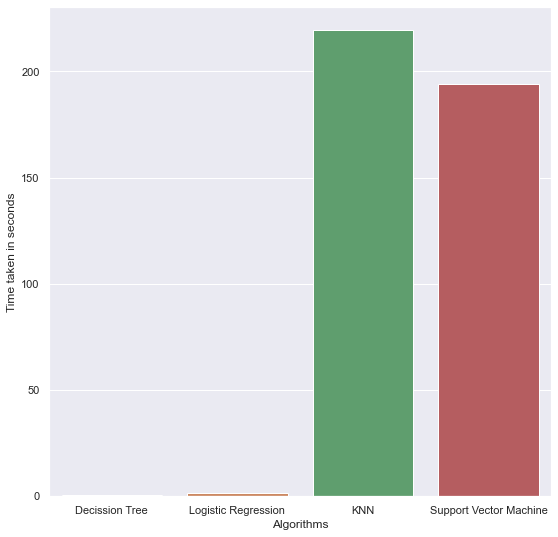

In [61]:
with sns.color_palette('muted'):
    algothrim_name = ['Decission Tree', 'Logistic Regression', 'KNN', 'Support Vector Machine']
    sns.set(rc={'figure.figsize':(9,9)})
    plt.xlabel("Algorithms")
    plt.ylabel("Time taken in seconds")
    sns.barplot(algothrim_name, time_taken)

# Evaluation metrics

In [62]:
# lets consider Decision-tree beccause the time complexity and accuracy is more for that algorithm

#### Confusion matrix

In [63]:
con_mat = confusion_matrix(y_test, decission_pred)

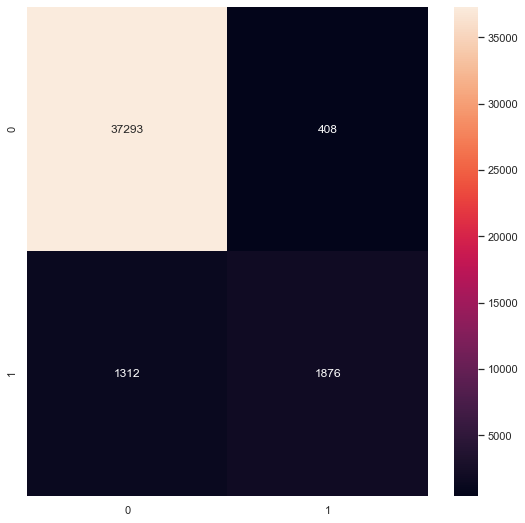

In [64]:
matrix = sns.heatmap(con_mat, annot=True, fmt='.5g')

<p>{0,0} False Negative <br>
{0,1} False Positive <br>
{1,0} True Negative <br>
{1,1} True Positive <br>
</p>

Accuracy is given by :
<img src='https://miro.medium.com/max/1400/1*gFW6rXbctrhWHxD8OXi4wg.png'>

In [65]:
accuracy_score(decission_pred, y_test)

0.957934896916041

The accuracy, in this case, is around 95%, around 3.2% records who have Covid-19 are classified as healthy. By this example what we are trying to say is that accuracy is not a good metric when the data set is unbalanced. Using accuracy in such scenarios can result in misleading interpretation of results.

We'll now look for accuracy (positive predictive value) in identifying data instances. The following is how precision is defined:

<img src='https://miro.medium.com/max/1122/1*VXnUvOEdf3IiYVCD6Wd2vg.png'>

A good classifier should have a precision of 1 (high). Only when the numerator and denominator are identical, as in TP = TP +FP, can precision become 1. This also implies that FP is zero. The value of the denominator gets bigger than the numerator as FP grows, and the precision value falls (which we do not want).

In [66]:
precision_score(y_test, decission_pred)

0.8213660245183888

Recall is given by
<img src = 'https://miro.medium.com/max/960/1*Aj3aYW4vwYAoJqyL36PVtQ.png'>

As a result, if FN approaches zero, the recal rate approaches one, indicating that the model is doing well.

In [67]:
recall_score(y_test, decission_pred)

0.588456712672522

F1 score is given by
<img src ='https://miro.medium.com/max/1400/1*9uo7HN1pdMlMwTbNSdyO3A.png'>

Only when accuracy and recall are both 1 does the F1 Score become 1. Only when both accuracy and recall are good can the F1 score rise. The F1 score is a better metric than accuracy since it is the harmonic mean of precision and recall.

In [68]:
f1_score(y_test, decission_pred)

0.6856725146198831

# Feature Importance

In [69]:
random_forest = RandomForestClassifier()
random_forest.fit(data_set, y)
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Time it took to calculate the importances: {elapsed_time:.3f} seconds")

Time it took to calculate the importances: 0.010 seconds


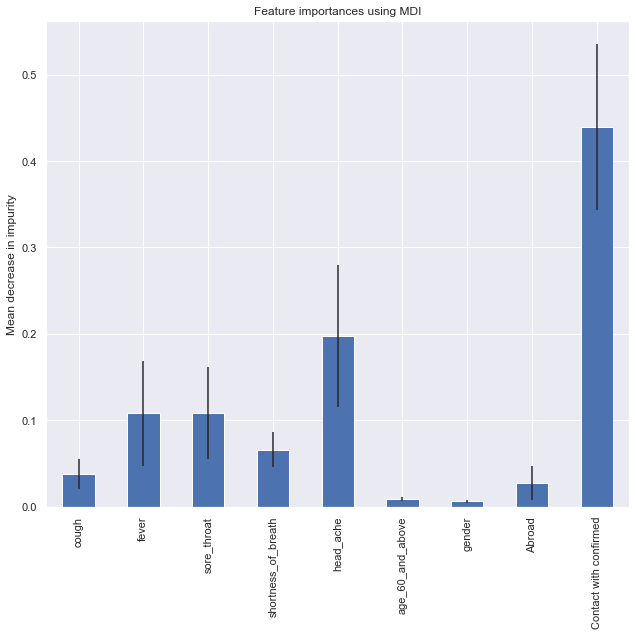

In [70]:
forest_importances = pd.Series(importances, index=data_set.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [71]:
start_time = time.time()
result = permutation_importance(
    random_forest, data_set, y, n_repeats=5, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=data_set.columns)

Elapsed time to compute the importances: 25.913 seconds


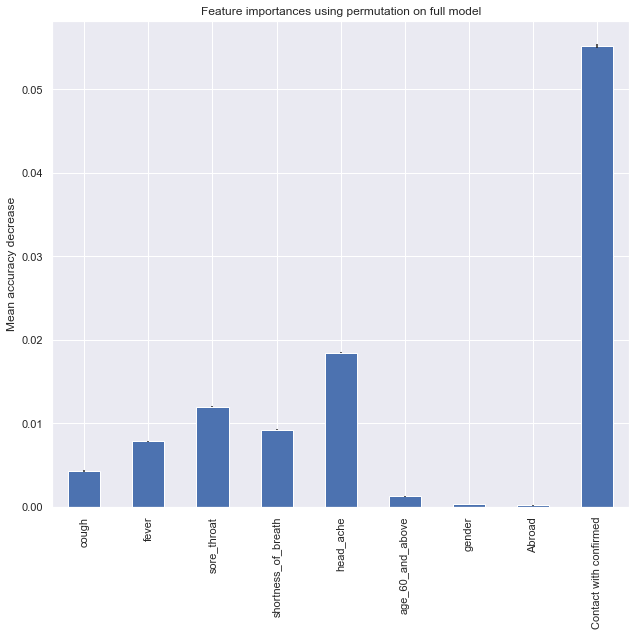

In [72]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Observation reveals that traits such as `Contact With Confirmed`, `Headache`, and `Sore Throat` are more relevant than others.

# CONCLUSION 
The final aim is to develop a model that employs the most effective machine learning approach for forecasting COVID-19. Also Our goal is to give efficient and trustworthy prediction with fewer characteristics and testing. In this study, just nine crucial features are taken into account. Four distinct classification techniques were utilized. Some of the approaches employed include support vector machine, K closest neighbors, logistic regression, and decision tree. Before being used in the model, the data was pre-processed. The support vector machine and decision trees are the strategies that give the best results in this paradigm. However, Decision trees were explored since they have a reduced time complexity. To widen this, other methodologies like as clustering, association rules, and genetic algorithms might be applied. Given the limits of this study, there is a need to develop a more complicated and combination of models to achieve greater accuracy for COVID-19 early prediction.

# REFERENCES
-  Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real 
time. The Lancet Infectious Diseases. Published online February 19, 2020. doi:10.1016/S1473-
3099(20)30120-1
-  Gozes O, Frid-Adar M, Greenspan H, et al. Rapid AI Development Cycle for the Coronavirus 
(COVID-19) Pandemic: Initial Results for Automated Detection & Patient Monitoring using 
Deep Learning CT Image Analysis. arXiv e-prints. 2020;2003:arXiv:2003.05037. Accessed May 
4, 2020. http://adsabs.harvard.edu/abs/2020arXiv200305037G
- Dataset taken from :https://github.com/nshomron/covidpred
- Feature importance reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- Dataset for further resarch: https://www.kaggle.com/datasets/imdevskp/corona-virus-report